In [56]:
# Importing Packages

import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

# Reading the Datasets

In [21]:
# Reading the dataset
# India = pd.read_csv('Data/2nd May/Austria_Covid.csv')
Australia = pd.read_csv('Data/2nd May/Australia_Covid.csv')
Austria = pd.read_csv('Data/2nd May/Austria_Covid.csv')
China = pd.read_csv('Data/2nd May/China_Covid.csv')
Iceland = pd.read_csv('Data/2nd May/Iceland_Covid.csv')
India = pd.read_csv('Data/2nd May/India_Covid.csv')
Iran = pd.read_csv('Data/2nd May/Iran_Covid.csv')
New_Zealand = pd.read_csv('Data/2nd May/New_Zealand_Covid.csv')
S_korea = pd.read_csv('Data/2nd May/S_Korea_Covid.csv')
Switzerland = pd.read_csv('Data/2nd May/Switzerland_Covid.csv')

In [25]:
def normalize_sig(df):
    df['norm_cases'] = df['new_cases']/np.std(df['new_cases'])
    return(df)

In [31]:
frames = [China, S_korea, Iceland, New_Zealand, Switzerland, Australia, Iran, Austria, India]
for i in frames:
    i = normalize_sig(i)

# Adding Stage Column for Countries

In [32]:
frames = [China, S_korea, Iceland, New_Zealand, Switzerland, Australia, Iran, Austria]
data = pd.concat(frames)


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 0 to 63
Data columns (total 20 columns):
Unnamed: 0                       627 non-null int64
Date                             627 non-null object
location                         627 non-null object
new_cases                        627 non-null int64
new_deaths                       627 non-null int64
total_cases                      627 non-null int64
total_deaths                     627 non-null int64
total_tests                      627 non-null float64
Lockdown                         627 non-null float64
Public_Health                    627 non-null float64
Governance_and_socio-economic    627 non-null float64
Humanitarian_exemption           627 non-null float64
Social_distancing                627 non-null float64
Movement_restrictions            627 non-null float64
Day                              627 non-null int64
Month                            627 non-null int64
Weekday                          627 non-null in

In [52]:
data = data.drop('Unnamed: 0', axis = 1)

In [61]:
data = pd.concat([data,dummy], axis = 1)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 0 to 63
Data columns (total 20 columns):
Unnamed: 0                       627 non-null int64
Date                             627 non-null object
location                         627 non-null object
new_cases                        627 non-null int64
new_deaths                       627 non-null int64
total_cases                      627 non-null int64
total_deaths                     627 non-null int64
total_tests                      627 non-null float64
Lockdown                         627 non-null float64
Public_Health                    627 non-null float64
Governance_and_socio-economic    627 non-null float64
Humanitarian_exemption           627 non-null float64
Social_distancing                627 non-null float64
Movement_restrictions            627 non-null float64
Day                              627 non-null int64
Month                            627 non-null int64
Weekday                          627 non-null in

In [34]:
# Plotting the Confirmed Cases with Date
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(df, label):
    sns.set(rc = {'figure.figsize':(11,4)})
    df[label].plot(linewidth = 3, color = 'purple')

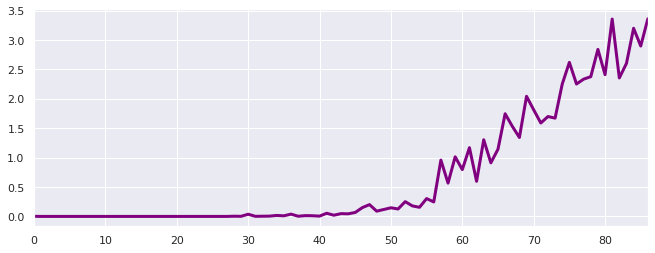

In [36]:
plot_data(India, 'norm_cases')

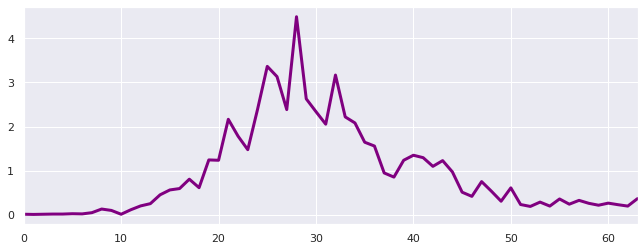

In [37]:
plot_data(Austria, 'norm_cases')

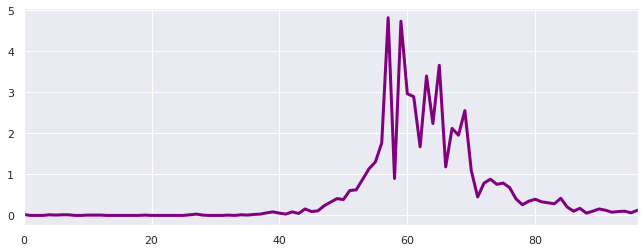

In [38]:
plot_data(Australia, 'norm_cases')

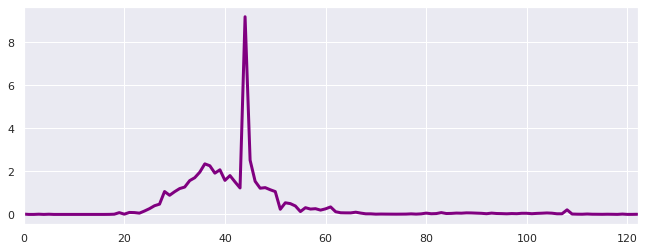

In [39]:
plot_data(China, 'norm_cases')

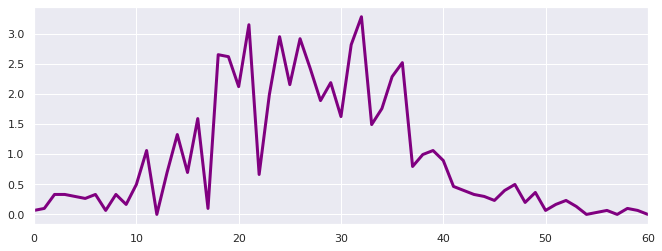

In [40]:
plot_data(Iceland, 'norm_cases')

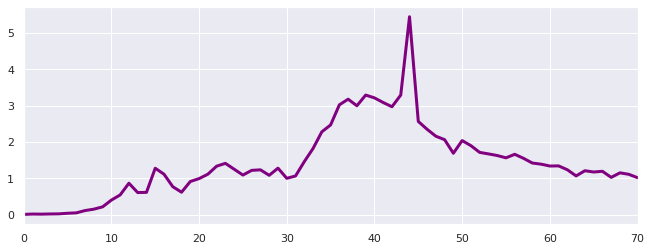

In [41]:
plot_data(Iran, 'norm_cases')

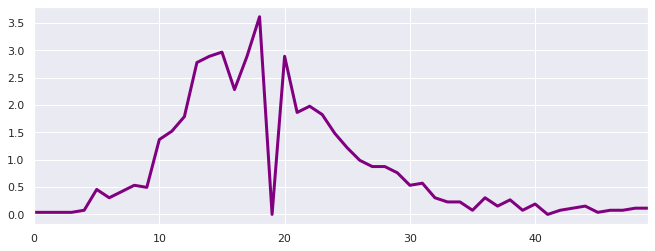

In [42]:
plot_data(New_Zealand, 'norm_cases')

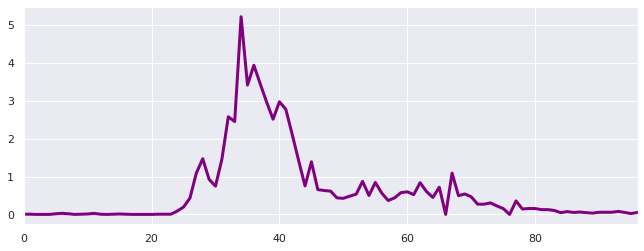

In [43]:
plot_data(S_korea, 'norm_cases')

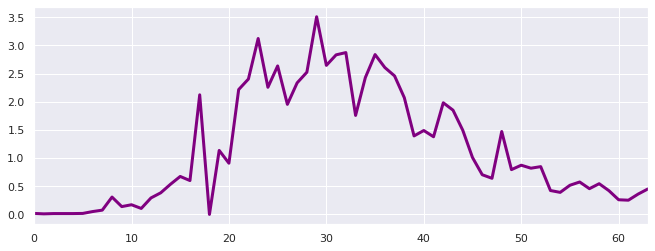

In [44]:
plot_data(Switzerland, 'norm_cases')

In [63]:
expr = """ norm_cases ~ days_completed + Weekday + Month + Lockdown + Public_Health + Movement_restrictions + Social_distancing + total_tests"""

def train_test_split(df,ratio, expr):
    mask = np.random.rand(len(df)) < ratio
    df_train = df[mask]
    df_test = df[~mask]
    print('Training data set length='+str(len(df_train)))
    print('Testing data set length='+str(len(df_test)))
    
#     # Expression for the Model 
#     expr1 = """ cases cases ~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
#     expr2 = """cases ~ day + month + year + Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
#     expr3 = """cases ~ day + month + year + Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests + popData2018"""

    ## Matrix Formation
    y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
    return X_train, y_train, X_test, y_test

def train_model(y_train, X_train):
    model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
    print(model.summary())
    return(model)

def predict(model, X_test):
    poisson_predictions = model.get_prediction(X_test)
    #.summary_frame() returns a pandas DataFrame
    predictions_summary_frame = poisson_predictions.summary_frame()
    print(predictions_summary_frame)
    return(predictions_summary_frame)
    
    
def plot_results(predictions_summary_frame,X_test, y_test, country, label):
    predicted_counts=predictions_summary_frame['mean']
    actual_counts = y_test[label]
    fig = plt.figure()
    fig.suptitle(str('Predicted Mean of Covid 19 Cofirmed Cases Count'))
    predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
    actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
    plt.legend(handles=[predicted, actual])
    plt.show()
    return(predicted_counts, actual_counts)
    
def plot_actual_vs_output(predicted_counts, actual_counts):
    plt.clf()
    fig = plt.figure()
    fig.suptitle('Scatter plot of Actual versus Predicted counts')
    plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
    plt.xlabel('Predicted counts')
    plt.ylabel('Actual counts')
    plt.show()

# TRAINING DATA ON WORLD

## PLOTTING THE CORRELATION GRAPH

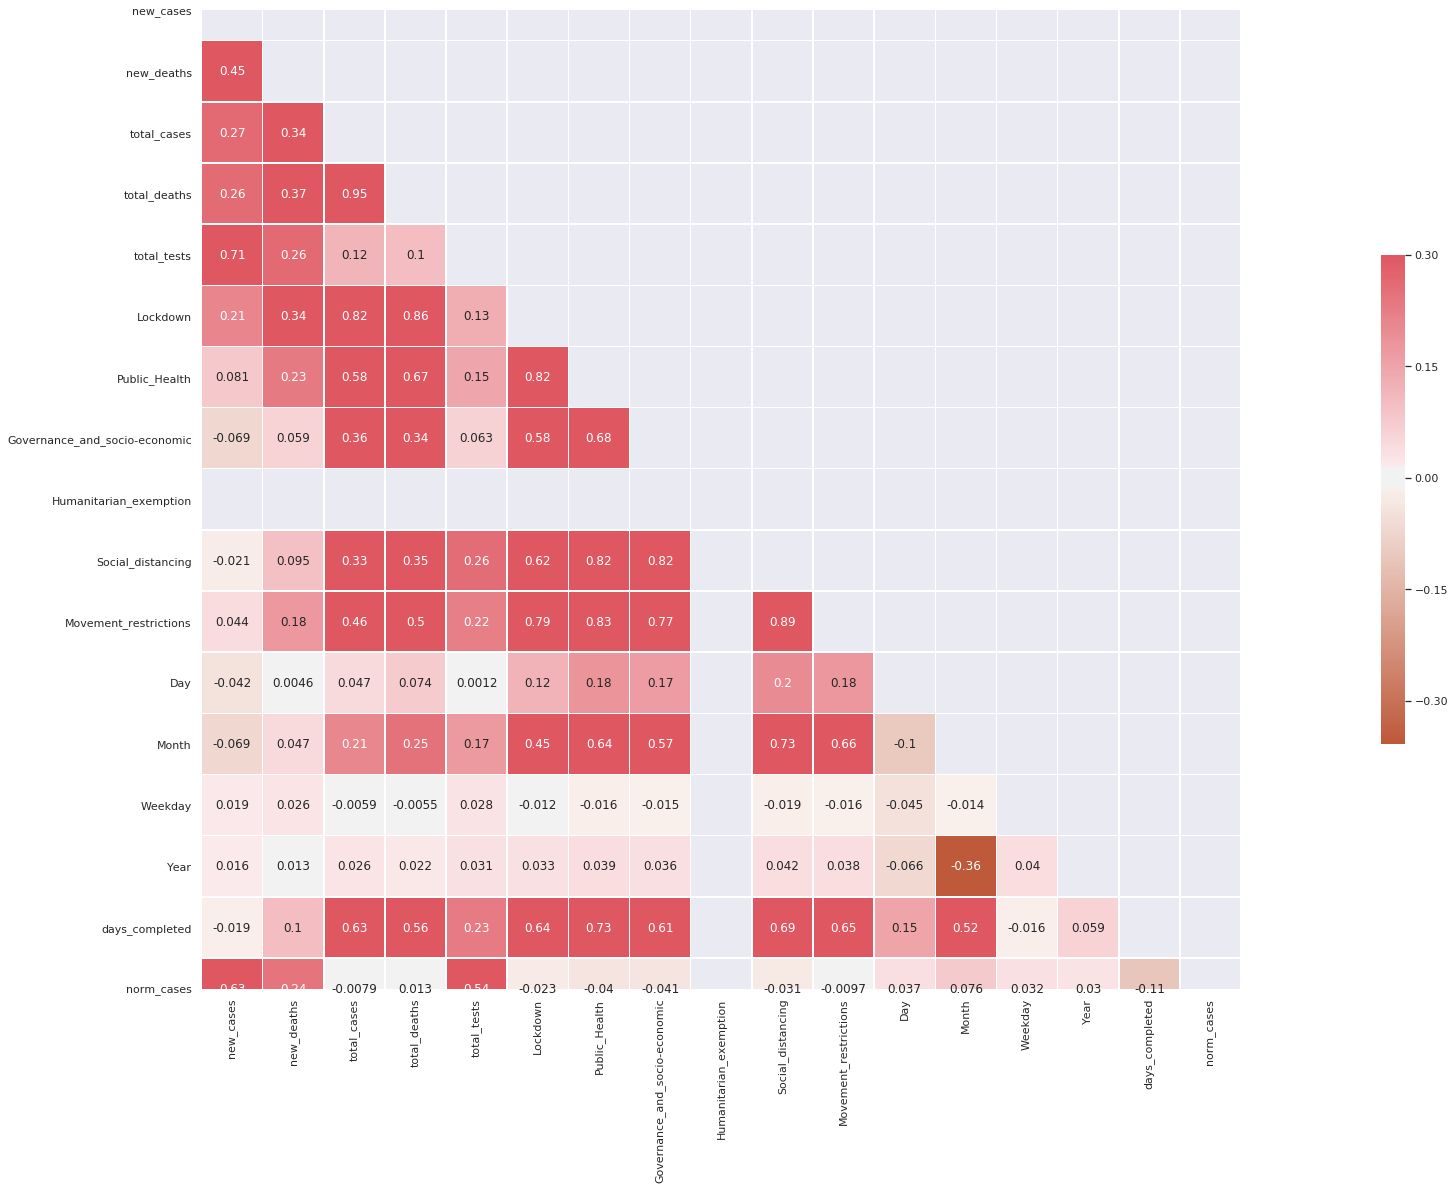

In [59]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(22, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## STEP 1: TEST-TRAIN SPLIT

In [70]:
X_train, y_train, X_test, y_test = train_test_split(data,1, expr) 
X_India, y_India, p, q = train_test_split(India,1, expr)

Training data set length=627
Testing data set length=0
Training data set length=87
Testing data set length=0


## STEP 2: MODEL TRAINING AND SUMMARY

In [65]:
model = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             norm_cases   No. Observations:                  627
Model:                            GLM   Df Residuals:                      618
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -690.21
Date:                Sun, 03 May 2020   Deviance:                       568.29
Time:                        21:13:38   Pearson chi2:                     604.
No. Iterations:                     8   Covariance Type:             nonrobust
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.6962      0.162     -4.291      0.000      -1.014      -0.378
days_completed     

## STEP 3: PREDICTIONS

In [71]:
predictions_frame = predict(model, X_India)

         mean    mean_se  mean_ci_lower  mean_ci_upper
0    0.771603   0.081579       0.627190       0.949269
1    0.779607   0.074952       0.645715       0.941262
2    0.787694   0.072177       0.658205       0.942657
3    0.795864   0.073968       0.663327       0.954883
4    0.804119   0.080284       0.661204       0.977925
5    0.812460   0.090424       0.653230       1.010505
6    0.712829   0.083277       0.566947       0.896248
7    0.720223   0.074773       0.587618       0.882752
8    0.727693   0.069024       0.604239       0.876371
9    0.735242   0.067001       0.614981       0.879020
10   0.742868   0.069290       0.618752       0.891880
11   0.750574   0.075745       0.615875       0.914732
12   0.758359   0.085654       0.607764       0.946269
13   0.665362   0.079441       0.526537       0.840789
14   0.672264   0.072215       0.544632       0.829805
15   0.679237   0.067623       0.558828       0.825590
16   0.686282   0.066441       0.567670       0.829678
17   0.693

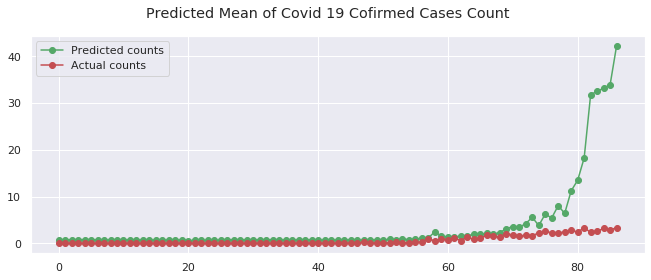

In [74]:
predicted_counts, actual_counts = plot_results(predictions_frame,X_India, y_India,India, 'norm_cases')